# 텍스트 키워드 분석

In [25]:
import matplotlib
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = 'C:/Users/82107/Downloads/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=8) 

In [3]:
#폰트종류설정
plt.rcParams["font.family"] = 'NanumGothic'

#폰트크기설정
#plt.rcParams["font.size"] = 20

## 데이터 전처리

In [4]:
import konlpy
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\82107\AppData\Local\Temp\ipykernel_21480\691330863.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [5]:
file = open('../../data/stop_word.txt', 'r')

stopWord = []
l = ''
while True:
    l = file.readline()
    stopWord.append(l[:-1])
    if l == '':
        break

In [6]:
len(stopWord)

676

In [7]:
import pandas as pd
import numpy as np
data_df = pd.read_csv('../../data/ulsan_attraction_table.csv')
data_df.head()

,place_id,u_id,user_id,score,comment,p_id
0,가지산 입석대,0,김호영(황소바위),5,NaN,248
1,가지산 입석대,1,기회란,4,NaN,248
2,가지산 입석대,2,손영진(산동무),5,NaN,248
3,가지산,0,김호영(황소바위),5,NaN,16
4,가지산,3,여름햇살,5,계단과 가파른 길이 많아 힘은 들지만 정상에서 바라보는 영남알프스의 풍경 값으로는 ...,16


In [8]:
print(data_df['comment'].nunique())
print(data_df['score'].nunique())

data_df.drop_duplicates(subset=['comment'], inplace=True)

8130
5


In [9]:
print(data_df.isnull().sum())

data_df = data_df.dropna(how='any')

place_id    0
u_id        0
user_id     0
score       0
comment     1
p_id        0
dtype: int64


In [10]:
data_df['comment'] = data_df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", "")

C:\Users\82107\AppData\Local\Temp\ipykernel_21480\2728893579.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['comment'] = data_df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", "")


In [11]:
data_df['comment'].replace('', np.nan, inplace=True)
print(len(data_df))
print(data_df.isnull().sum())

8130
place_id     0
u_id         0
user_id      0
score        0
comment     26
p_id         0
dtype: int64


In [12]:
data_df.head()

,place_id,u_id,user_id,score,comment,p_id
4,가지산,3,여름햇살,5,계단과 가파른 길이 많아 힘은 들지만 정상에서 바라보는 영남알프스의 풍경 값으로는 ...,16
5,가지산,4,Jayen Yang,5,등린이 번째 산행 다녀왔습니다영알 영남 알프스 밀양 가지산대 명산을 다녀왔습니다 ...,16
6,가지산,5,최정혜,4,상양마을에서 올라가는 코스를 잡았구요마을에 주차장십여대주차가능 및 경로당화장실 이용...,16
7,가지산,6,이창환,4,가지산은 울산광역시 울주군과 경상남도 밀양시 경상북도 청도군의 경계에 있는 산이다년...,16
8,가지산,7,TaeHwa Kwon,3,영남날프스 산중에 겨울 눈을 제일 자주 볼수 있는 산,16


In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8130 entries, 4 to 15404
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   place_id  8130 non-null   object
 1   u_id      8130 non-null   int64 
 2   user_id   8130 non-null   object
 3   score     8130 non-null   int64 
 4   comment   8104 non-null   object
 5   p_id      8130 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 444.6+ KB


## 토큰화 및 불용어 제거

In [14]:
from konlpy.tag import Mecab

mecab =Mecab(dicpath=r'C:\\mecab\\mecab-ko-dic')

reviews = []
for sentence in data_df['comment']:
    reviews.append([word for word in mecab.morphs(str(sentence)) if not word in stopWord])

reviews[:3]

[['계단',
  '가파른',
  '길',
  '많',
  '힘',
  '은',
  '정상',
  '바라보',
  '는',
  '영남',
  '알프스',
  '풍경',
  '값',
  '는',
  '치를',
  '만',
  '한',
  '가치',
  '있',
  '단',
  '석남',
  '터널',
  '오르',
  '는',
  '초입',
  '계단',
  '은',
  '단',
  '사이',
  '간격',
  '너무',
  '높',
  '오를',
  '는',
  '문제',
  '없',
  '원점',
  '회귀',
  '는',
  '등산객',
  '는',
  '무리',
  '있'],
 ['린',
  '번',
  '째',
  '산행',
  '다녀왔',
  '영알',
  '영남',
  '알프스',
  '밀양',
  '가지',
  '산대',
  '명산',
  '다녀왔',
  '코스',
  '는',
  '석남',
  '터널',
  '시작',
  '린이',
  '도',
  '어렵',
  '지',
  '않',
  '게',
  '산행',
  '가능',
  '합니다'],
 ['상양',
  '마을',
  '올라가',
  '는',
  '코스',
  '잡',
  '았',
  '구요',
  '마을',
  '주차장',
  '십',
  '대',
  '주차',
  '가능',
  '경로당',
  '화장실',
  '이용',
  '가능',
  '했',
  '정상',
  '이나',
  '올라가',
  '는',
  '도중',
  '이용',
  '할',
  '만',
  '한',
  '화장실',
  '은',
  '없',
  '올라가',
  '는',
  '도중',
  '예쁜',
  '풍경',
  '많',
  '았',
  '는데']]

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
print(tokenizer.word_index)

{'좋': 1, '고': 2, '는': 3, '있': 4, '은': 5, '도': 6, '기': 7, '곳': 8, '한': 9, '아요': 10, '다': 11, '게': 12, '수': 13, '어요': 14, '음': 15, '네요': 16, '입니다': 17, '면': 18, '되': 19, '울산': 20, '보': 21, '너무': 22, '았': 23, '지': 24, '없': 25, '만': 26, '많': 27, '잘': 28, '었': 29, '산책': 30, '합니다': 31, '길': 32, '볼': 33, '는데': 34, '물': 35, '할': 36, '같': 37, '어서': 38, '시': 39, '않': 40, '안': 41, '장소': 42, '해': 43, '시설': 44, '시원': 45, '라': 46, '사람': 47, '놀': 48, '적': 49, '했': 50, '함': 51, '주차장': 52, '분': 53, '많이': 54, '서': 55, '주차': 56, '공원': 57, '해서': 58, '번': 59, '산': 60, '인': 61, '넓': 62, '정말': 63, '듯': 64, '깨끗': 65, '바다': 66, '더': 67, '경치': 68, '거': 69, '동굴': 70, '아주': 71, '니': 72, '방문': 73, '생각': 74, '보다': 75, '주': 76, '요': 77, '가족': 78, '아서': 79, '최고': 80, '정도': 81, '코스': 82, '야경': 83, '주변': 84, '세요': 85, '관리': 86, '여름': 87, '싶': 88, '중': 89, '타': 90, '며': 91, '된': 92, '원': 93, '넘': 94, '조용': 95, '애': 96, '추천': 97, '엔': 98, '구경': 99, '겠': 100, '던': 101, '작': 102, '대': 103, '꼭': 104, '멋진': 105, '먹': 106, '갔

## 빈도수 확인

In [16]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value

    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value

print("전체 단어 수 :", words_cnt)
print("빈도가 {}이하인 희귀 단어 수 : {}".format(threshold-1, rare_cnt))
print("희귀 단어 비율: {}.".format((rare_cnt / words_cnt)*100))
print("희귀 단어 등장 빈도 비율: {}".format((rare_freq / words_freq)*100))

전체 단어 수 : 9837
빈도가 2이하인 희귀 단어 수 : 6342
희귀 단어 비율: 64.47087526684965.
희귀 단어 등장 빈도 비율: 6.4090480678605095


In [17]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

3497


In [18]:
print('리뷰 최대 길이:', max(len(l) for l in reviews))
print('리뷰 평균 길이:', sum(map(len, reviews))/len(reviews))

리뷰 최대 길이: 269
리뷰 평균 길이: 14.877490774907749


Text(0, 0.5, 'number of samples')

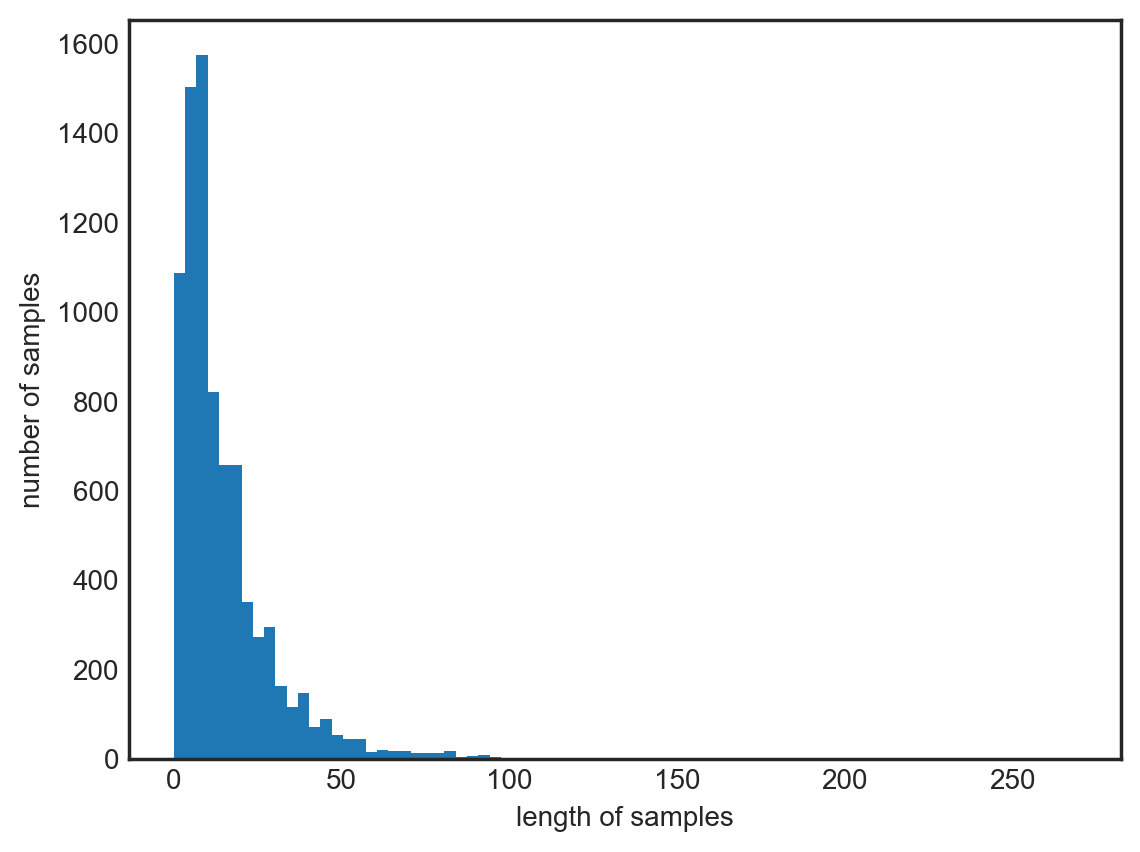

In [19]:
plt.hist([len(s) for s in reviews], bins= 80)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

In [21]:
tagger = Mecab(dicpath=r'C:\\mecab\\mecab-ko-dic')

nouns = []
for idx in data_df.index:
    review = data_df.loc[idx, 'comment']
    for noun in tagger.nouns(str(review)):
        nouns.append(noun)
        
nouns[:10]  

['계단', '길', '힘', '정상', '영남', '알프스', '풍경', '값', '만', '가치']

## 형태소 분석을 이용한 명사 추출

In [22]:
nouns = []
for idx in data_df.index:
    review = data_df.loc[idx, 'comment']
    for noun in tagger.nouns(str(review)):
        if noun not in stopWord:
            nouns.append(noun)

nouns[:10]

['계단', '길', '힘', '정상', '영남', '알프스', '풍경', '값', '만', '가치']

## 단어 빈도수 측정

In [23]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'곳': 1574,
 '수': 1020,
 '울산': 770,
 '산책': 542,
 '물': 461,
 '길': 380,
 '장소': 368,
 '시설': 345,
 '사람': 331,
 '주차장': 296,
 '만': 289,
 '주차': 276,
 '공원': 272,
 '번': 256,
 '바다': 240,
 '거': 232,
 '듯': 232,
 '동굴': 232,
 '경치': 231,
 '방문': 226,
 '생각': 222,
 '게': 217,
 '산': 211,
 '가족': 210,
 '최고': 205,
 '정도': 197,
 '코스': 196,
 '야경': 190,
 '주변': 188,
 '관리': 186,
 '여름': 185,
 '중': 181,
 '분': 180,
 '애': 170,
 '추천': 169,
 '원': 168,
 '구경': 165,
 '체험': 154,
 '사진': 150,
 '바람': 146,
 '풍경': 142,
 '힐링': 141,
 '공간': 138,
 '알프스': 137,
 '영남': 134,
 '신불산': 134,
 '자연': 134,
 '정원': 133,
 '등산': 132,
 '정상': 131}

## 단어 빈도 시각화

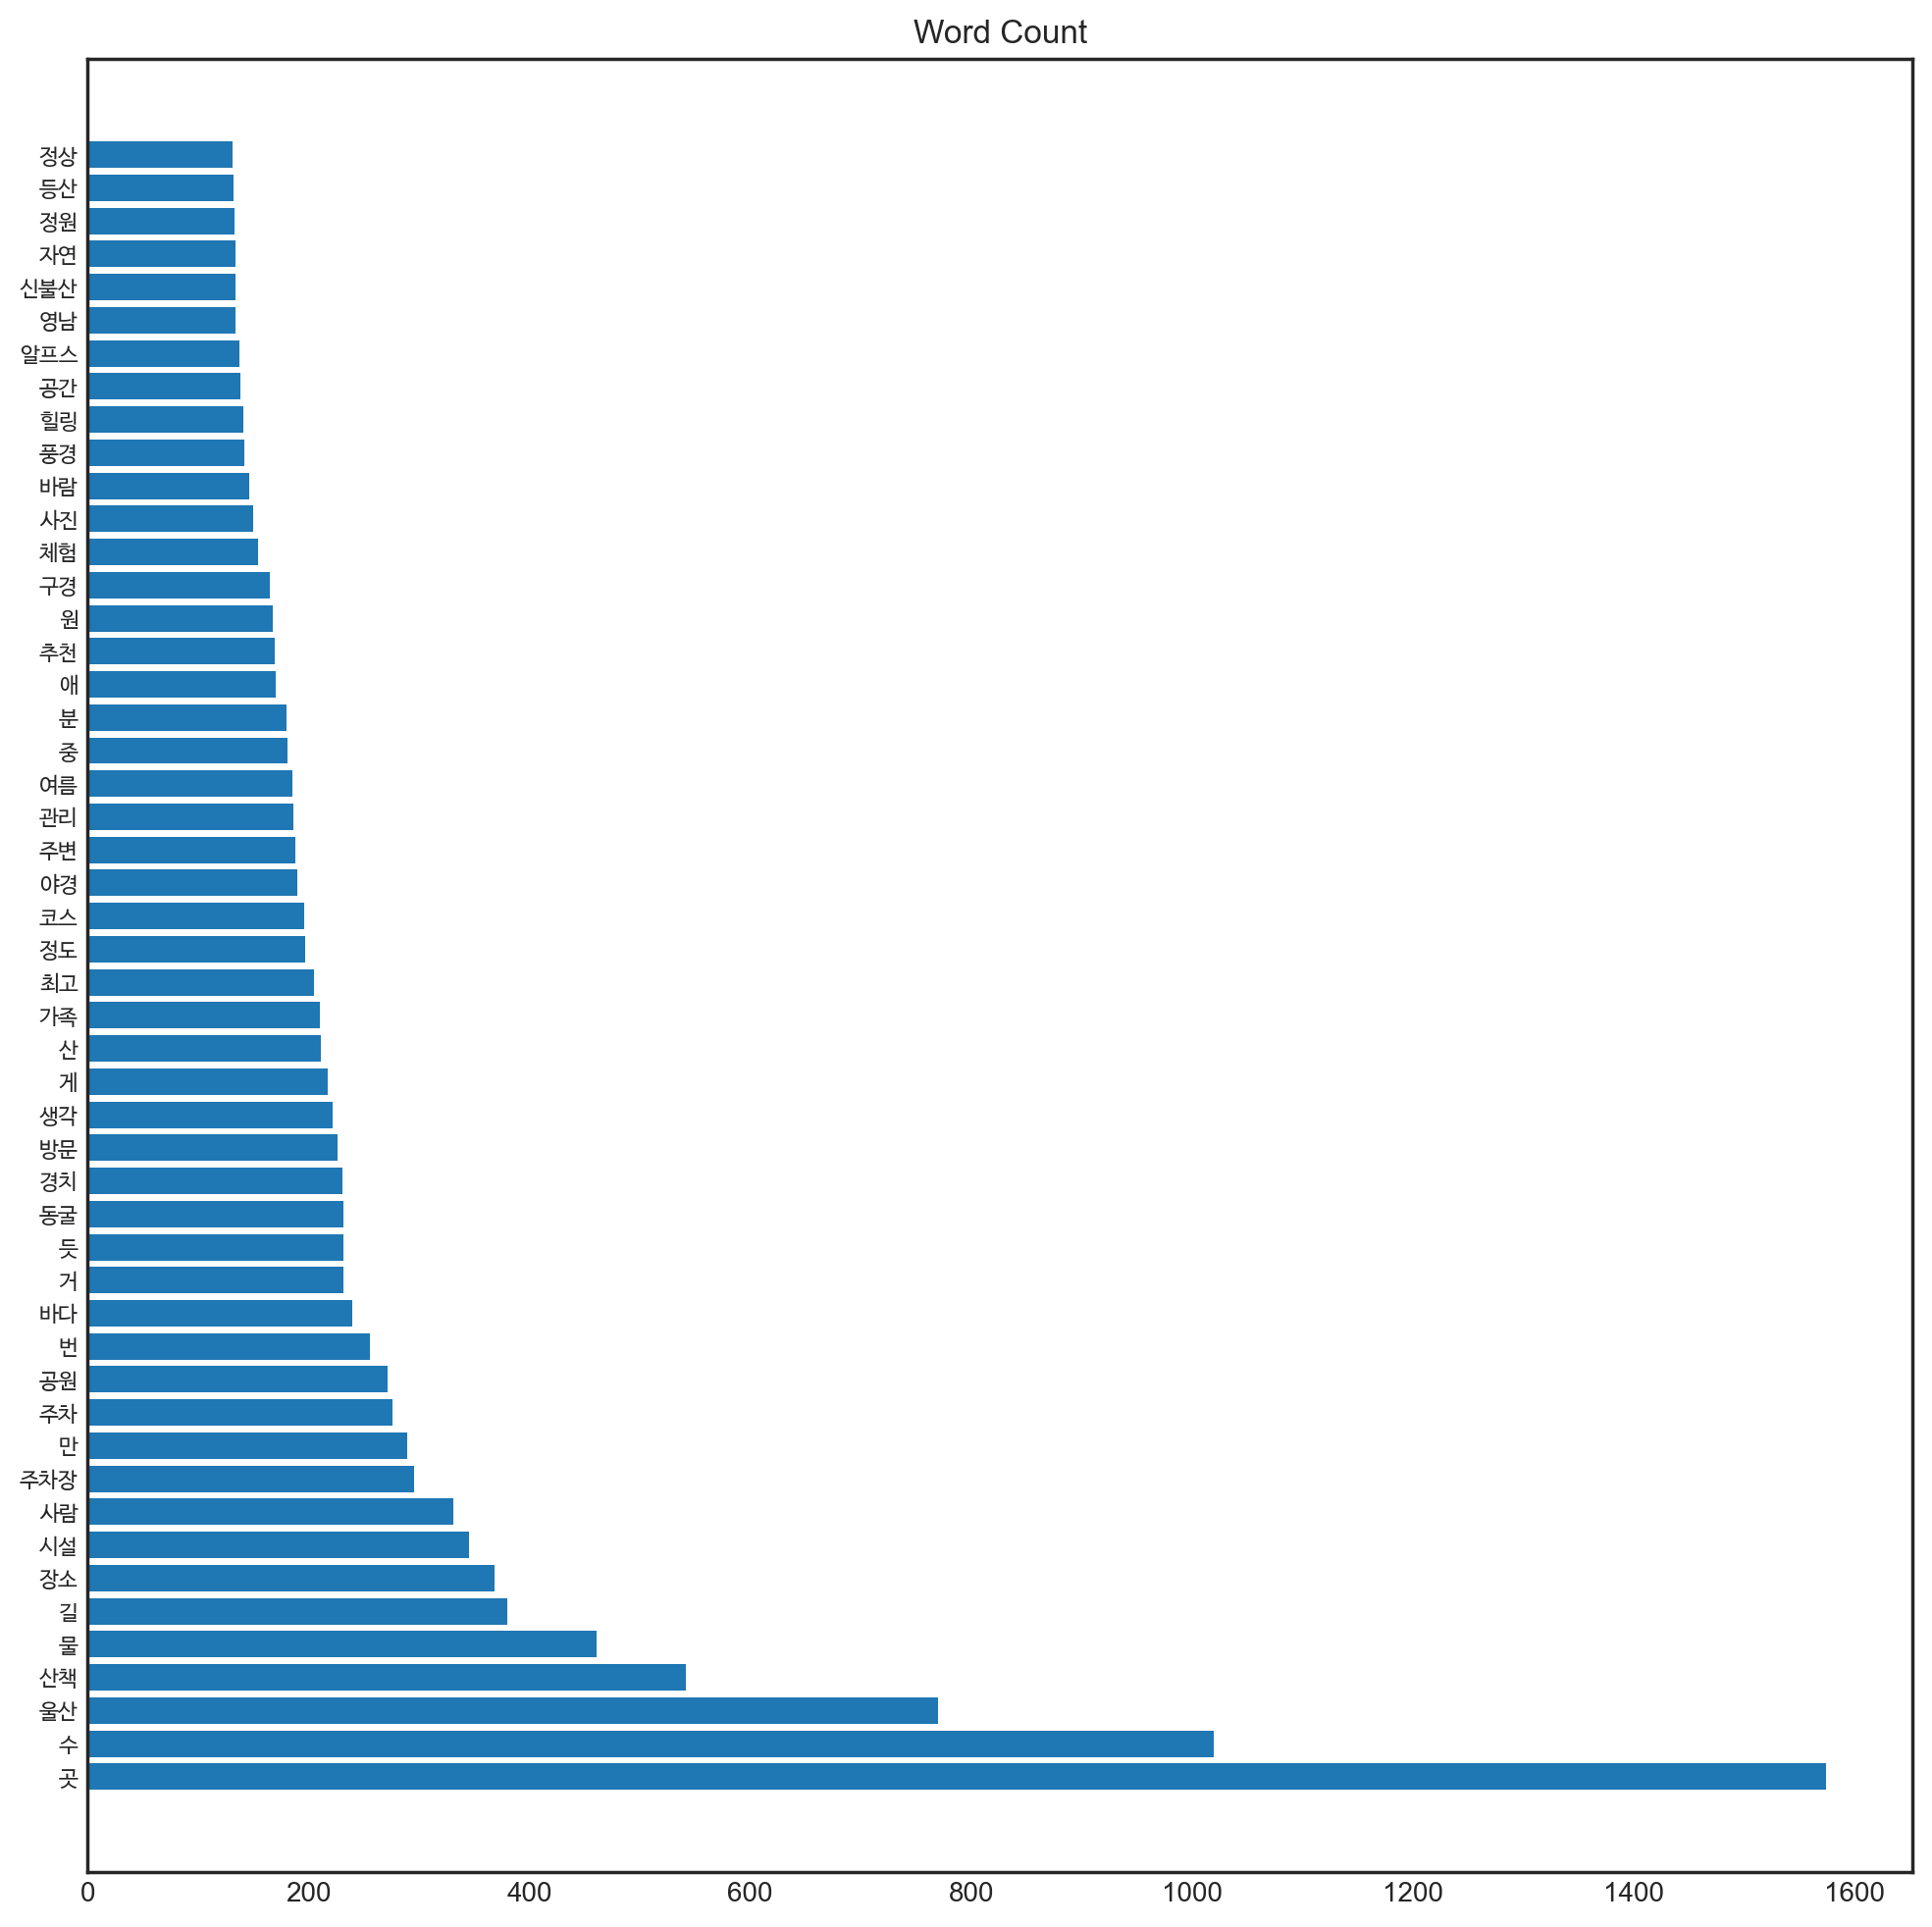

In [26]:
import numpy as np
y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12,12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys(), fontproperties = fontprop)
plt.show();

## WordCloud

In [27]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path=fontpath)
wc.generate_from_frequencies(top_nouns)

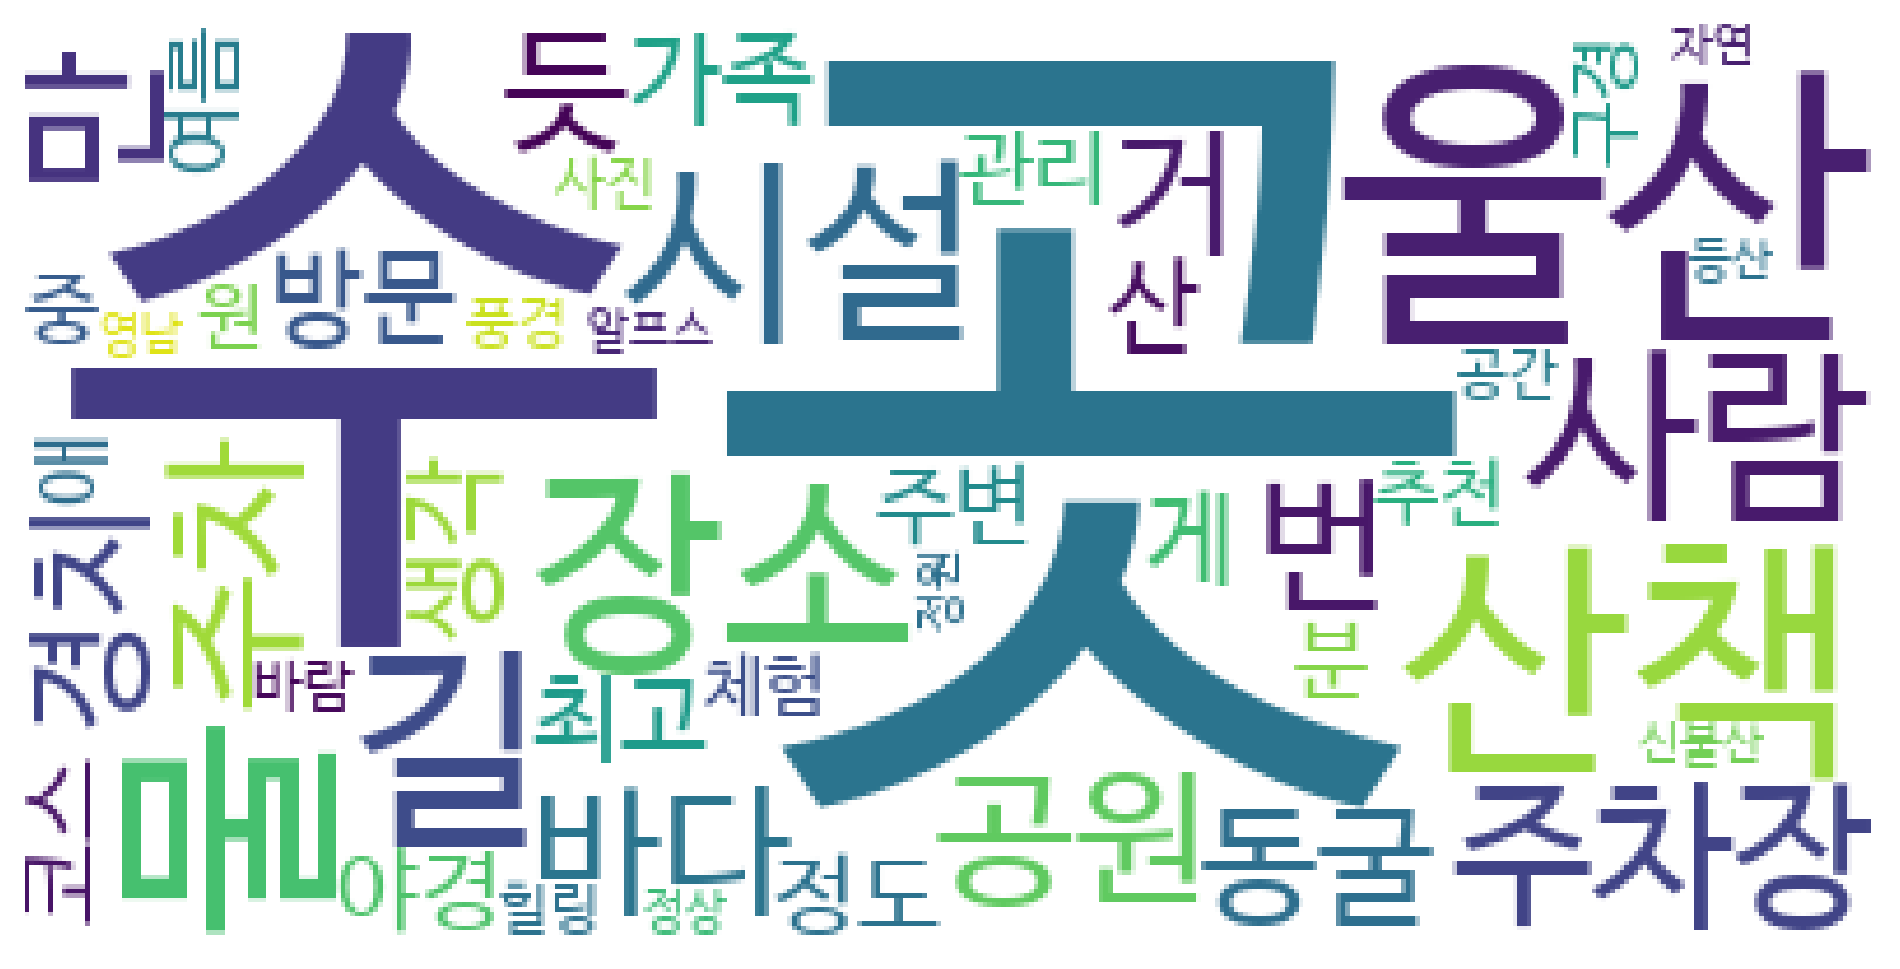

In [28]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()